In [1]:
## Uploading Librarys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("diamonds_data.csv")

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
## As the column names of few columns are difficult let's convert it into readable form
df.rename(columns = {'carat':'Carat', 'cut': 'Cut','color':'Color','clarity':'Clarity','depth':'Depth','table':'Table' ,'price':'Price', 'x': 'Length',	'y':'Width', 'z':'Height'}, inplace = True)

'carat(Weight of Daimond)':'Carat', 
'Cut(Quality)': 'Cut',
'Price(in US dollars)':'Price', 
'X(length)': 'Length',
'Y(width)':'Width',
'Z(Depth)':'Height'

In [7]:
## checking for null value.
df.isnull().sum()

Carat      0
Cut        0
Color      0
Clarity    0
Depth      0
Table      0
Price      0
Length     0
Width      0
Height     0
dtype: int64

### As there are no null value we will go for the next part the Value Counts of categorical Columns

In [8]:
df.shape

(53940, 10)

In [9]:
df.Cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: Cut, dtype: int64

In [10]:
df.Color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: Color, dtype: int64

In [11]:
df.Clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: Clarity, dtype: int64

In [12]:
df.describe()

,Carat,Depth,Table,Price,Length,Width,Height
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Correlation

<AxesSubplot:>

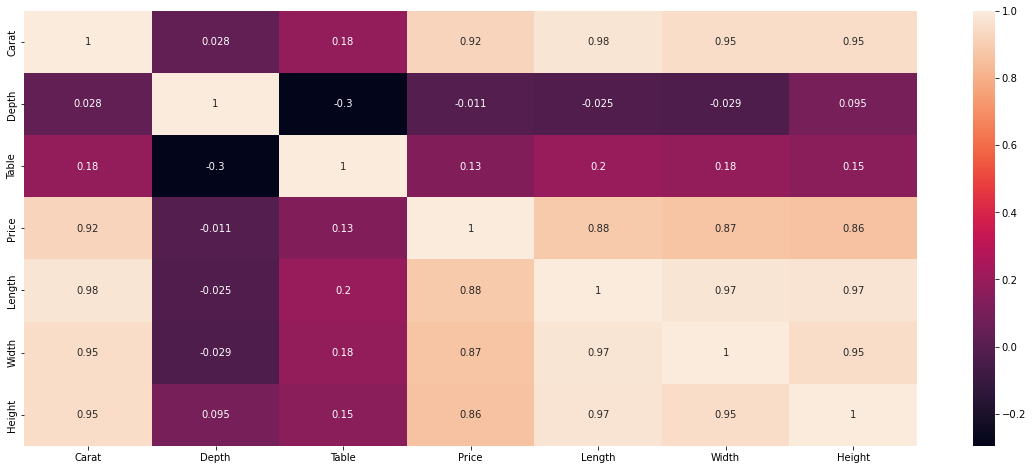

In [13]:
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), annot = True)

## Checking linearity

<Figure size 1440x1440 with 0 Axes>

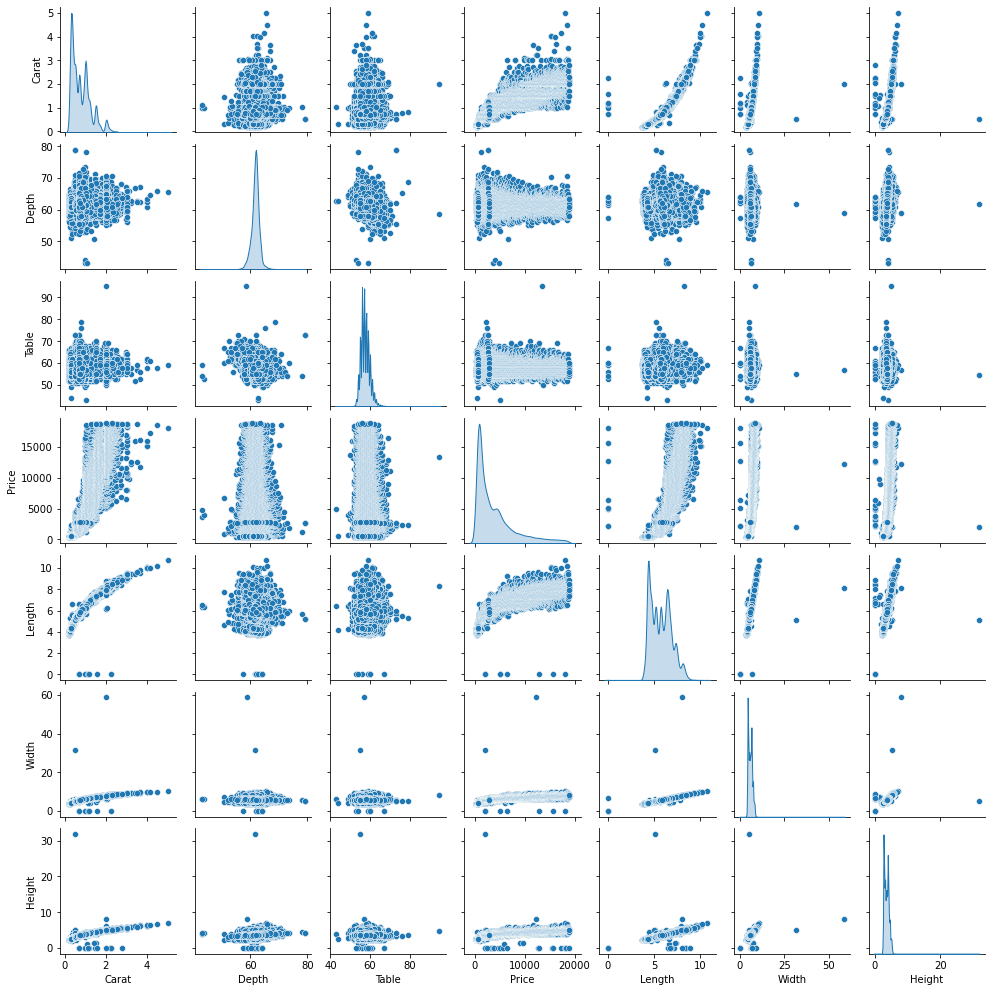

In [14]:

plt.figure(figsize = (20,20))
columns= ['Carat','Depth','Table','Price','Length','Width','Height']

# draw the pairplot such that the diagonal should be density plot and the other graphs should be scatter plot
sns.pairplot(df[columns], size=2, kind= "scatter", diag_kind="kde")

# display the plot
plt.show()

## Checking Outliers

<AxesSubplot:>

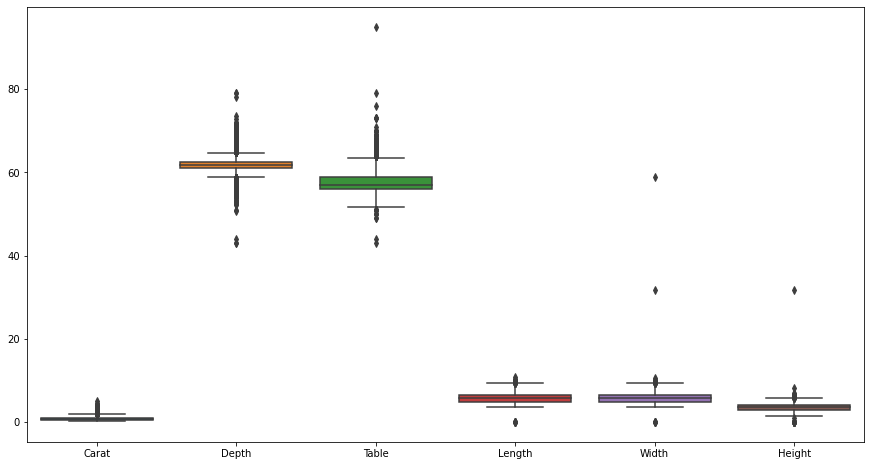

In [15]:
columns= ['Carat','Depth','Table','Length','Width','Height']
plt.figure(figsize = (15,8))
sns.boxplot(data = df[columns])

## Normalizing the target column

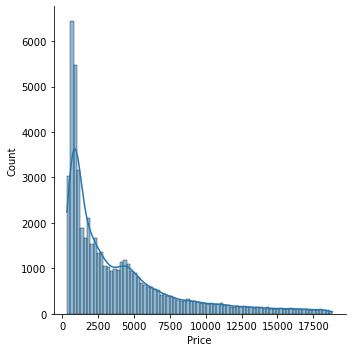

In [16]:
sns.displot(df['Price'],kde=True)

In [17]:
df['log_price']=np.log(df['Price'])

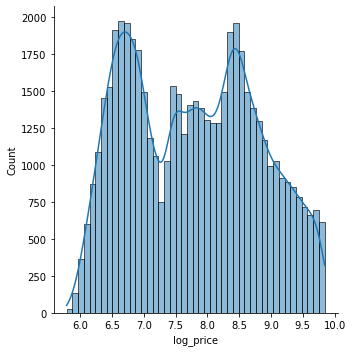

In [18]:
sns.displot(df['log_price'],kde=True)

In [19]:
cat_cols=df.select_dtypes(include=['object']).columns.to_list()

## Visualization

Column Name = Cut
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Number of unique values = 5


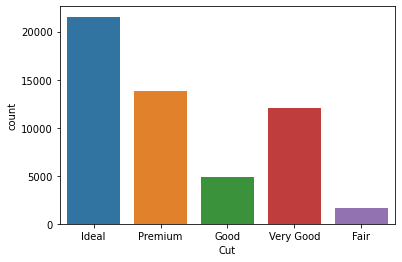

Column Name = Color
['E' 'I' 'J' 'H' 'F' 'G' 'D']
Number of unique values = 7


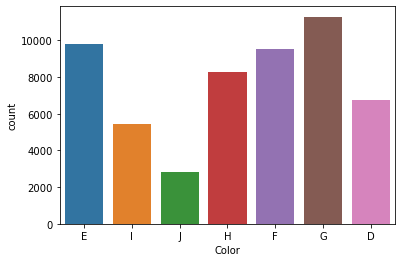

Column Name = Clarity
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
Number of unique values = 8


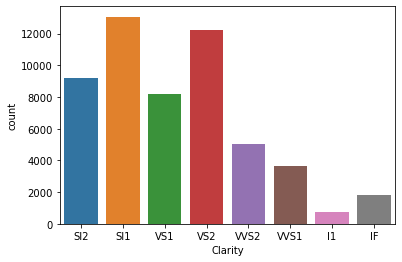

In [20]:
for i in cat_cols:
    print('Column Name =',i)
    print(df[i].unique())
    print('Number of unique values =',df[i].nunique())
    sns.countplot(df[i])
    plt.show()

## Converting Categorical to numerical data

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
cols = ['Cut',	'Color',	'Clarity']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [23]:
df.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,Length,Width,Height,log_price
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,5.786897
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,5.786897
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,5.789960
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,5.811141
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,5.814131


## Building Models

In [24]:
X = df.drop(['Price','log_price'], axis = 1)
y = df[['Price','log_price']]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state = 1)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43152, 9), (10788, 9), (43152, 2), (10788, 2))

In [28]:
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
import statsmodels
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR

## Building models without log_price

In [29]:
regression_model=[LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), SVR(kernel='poly')]

In [30]:
for i in range(0,len(regression_model)):
    regression_model[i].fit(X_train,y_train['Price'])
    print(f'\n{regression_model[i]}: \n')
    y_pred_train=regression_model[i].predict(X_train)
    y_pred_test=regression_model[i].predict(X_test)
    
    print('R2 train: ',r2_score(y_train['Price'],y_pred_train))
    print('R2 test: ',r2_score(y_test['Price'],y_pred_test))   

    print('rmse train: ',rmse(y_train['Price'],y_pred_train))
    print('rmse test: ',rmse(y_test['Price'],y_pred_test))   



LinearRegression(): 

R2 train:  0.8844942292975202
R2 test:  0.8873652514530768
rmse train:  1359.850676303807
rmse test:  1322.9423241040315

DecisionTreeRegressor(): 

R2 train:  0.9999948113472171
R2 test:  0.9640811589709535
rmse train:  9.114160770701602
rmse test:  747.0778692160636

RandomForestRegressor(): 

R2 train:  0.9973472193349978
R2 test:  0.9810297133505045
rmse train:  206.0819960802579
rmse test:  542.9272758977702

AdaBoostRegressor(): 

R2 train:  0.8852695030720197
R2 test:  0.8819580751862957
rmse train:  1355.2793394675705
rmse test:  1354.3248747109806

SVR(kernel='poly'): 

R2 train:  -0.07040766864727721
R2 test:  -0.07498545667114698
rmse train:  4139.653455557572
rmse test:  4087.012897922126


## Building models with Log_price

In [31]:
for i in range(0,len(regression_model)):
    regression_model[i].fit(X_train,y_train['log_price'])
    print(f'\n{regression_model[i]}: \n')
    y_pred_train=regression_model[i].predict(X_train)
    y_pred_test=regression_model[i].predict(X_test)
    
    print('R2 train: ',r2_score(y_train['log_price'],y_pred_train))
    print('R2 test: ',r2_score(y_test['log_price'],y_pred_test))   

    print('rmse train: ',rmse(y_train['log_price'],y_pred_train))
    print('rmse test: ',rmse(y_test['log_price'],y_pred_test))   



LinearRegression(): 

R2 train:  0.9444370329914902
R2 test:  0.9510387613615795
rmse train:  0.23969255126506622
rmse test:  0.2225153084068696

DecisionTreeRegressor(): 

R2 train:  0.9999795053092496
R2 test:  0.9852428815736278
rmse train:  0.004603440227243167
rmse test:  0.12216153403330603

RandomForestRegressor(): 

R2 train:  0.9988390205584937
R2 test:  0.9921017897335357
rmse train:  0.034647674314739946
rmse test:  0.0893712931814826

AdaBoostRegressor(): 

R2 train:  0.9425880055651538
R2 test:  0.9421251705230199
rmse train:  0.2436481626777162
rmse test:  0.24192377945890745

SVR(kernel='poly'): 

R2 train:  0.9364192934002613
R2 test:  0.953959675586112
rmse train:  0.2564038244878357
rmse test:  0.21577587380754784


## After removing outliers

In [32]:
def boundaries(data,variable):
    LL=data[variable].quantile(.25)-(1.5*(data[variable].quantile(.75)-data[variable].quantile(.25)))
    UL=data[variable].quantile(.75)+(1.5*(data[variable].quantile(.75)-data[variable].quantile(.25)))
    return LL,UL

In [33]:
for col in columns:
    LL,UL=boundaries(df,col)
    
    df[col]=np.where(df[col]<LL,LL,
                         np.where(df[col]>UL,UL,df[col]))

<AxesSubplot:>

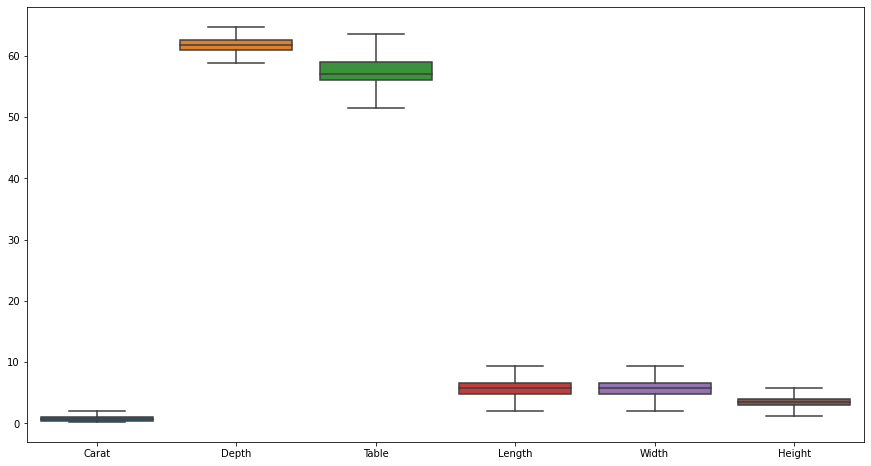

In [34]:
plt.figure(figsize = (15,8))
sns.boxplot(data = df[columns])

In [35]:
vcorr=df.corr()

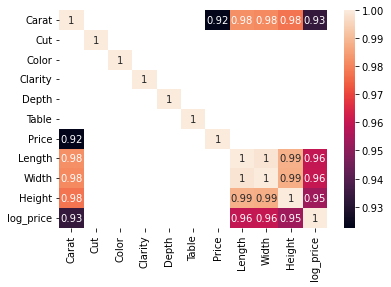

In [36]:
sns.heatmap(vcorr[(vcorr>0.90) | (vcorr<-0.90)],annot=True)
plt.show()

In [37]:
X1 = df.drop(['Price','log_price'], axis = 1)
y1 = df[['Price','log_price']]

In [38]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = .20, random_state = 1)

In [39]:
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((43152, 9), (10788, 9), (43152, 2), (10788, 2))

## Log_price

In [42]:
for i in range(0,len(regression_model)):
    regression_model[i].fit(X1_train,y1_train['log_price'])
    print(f'\n{regression_model[i]}: \n')
    y1_pred_train=regression_model[i].predict(X1_train)
    y1_pred_test=regression_model[i].predict(X1_test)
    
    print('R2 train: ',r2_score(y1_train['log_price'],y1_pred_train))
    print('R2 test: ',r2_score(y1_test['log_price'],y1_pred_test))   

    print('rmse train: ',rmse(y1_train['log_price'],y1_pred_train))
    print('rmse test: ',rmse(y1_test['log_price'],y1_pred_test))   



LinearRegression(): 

R2 train:  0.9483372028282898
R2 test:  0.9529349012757462
rmse train:  0.23112705305500117
rmse test:  0.21816404808387876

DecisionTreeRegressor(): 

R2 train:  0.9999795053092496
R2 test:  0.9848310568364833
rmse train:  0.004603440227243167
rmse test:  0.12385437681946793

RandomForestRegressor(): 

R2 train:  0.9988463867491261
R2 test:  0.9921008824384835
rmse train:  0.034537583004404356
rmse test:  0.08937642623066987

AdaBoostRegressor(): 

R2 train:  0.9447359546117768
R2 test:  0.9437979586237392
rmse train:  0.23904692418881682
rmse test:  0.2384019160932916

SVR(kernel='poly'): 

R2 train:  0.950964625669859
R2 test:  0.9548920544168101
rmse train:  0.2251731333641573
rmse test:  0.21357982206447398


## without log price

In [43]:
for i in range(0,len(regression_model)):
    regression_model[i].fit(X1_train,y1_train['Price'])
    print(f'\n{regression_model[i]}: \n')
    y1_pred_train=regression_model[i].predict(X1_train)
    y1_pred_test=regression_model[i].predict(X1_test)
    
    print('R2 train: ',r2_score(y1_train['Price'],y1_pred_train))
    print('R2 test: ',r2_score(y1_test['Price'],y1_pred_test))   

    print('rmse train: ',rmse(y1_train['Price'],y1_pred_train))
    print('rmse test: ',rmse(y1_test['Price'],y1_pred_test))


LinearRegression(): 

R2 train:  0.8942839434335366
R2 test:  0.8949599205912804
rmse train:  1300.9477603756195
rmse test:  1277.5627324318964

DecisionTreeRegressor(): 

R2 train:  0.9999948113472171
R2 test:  0.9643227505204417
rmse train:  9.114160770701602
rmse test:  744.5611925687928

RandomForestRegressor(): 

R2 train:  0.997339012129644
R2 test:  0.9807876565450047
rmse train:  206.40053939560426
rmse test:  546.3801144742072

AdaBoostRegressor(): 

R2 train:  0.8923768571644104
R2 test:  0.8888731985607491
rmse train:  1312.6296669749363
rmse test:  1314.0567486469363

SVR(kernel='poly'): 

R2 train:  -0.07042852041704006
R2 test:  -0.07496090806495981
rmse train:  4139.693776027477
rmse test:  4086.9662316894396


### **With or without removing outliers we can observe that random forest is giving the best model of with 99+ percent accuracy**